In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [26]:
dados = pd.read_excel('dados.xlsx')
dados.columns = ['Área_Relativa_Compacta', 'Área_Superfície', 'Área_Parede', 'Área_Telhado',
                 'Altura_Total', 'Orientação', 'Área_Envidraçada', 'Distribuição_Envidraçada',
                 'Carga_Aquecimento', 'Carga_Resfriamento']

display(dados)

,Área_Relativa_Compacta,Área_Superfície,Área_Parede,Área_Telhado,Altura_Total,Orientação,Área_Envidraçada,Distribuição_Envidraçada,Carga_Aquecimento,Carga_Resfriamento
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [27]:
seed = 60
modelo = RandomForestRegressor(n_estimators=100, random_state=seed)
X = dados.drop(['Carga_Aquecimento', 'Carga_Resfriamento'], axis=1)
y = dados['Carga_Aquecimento']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=seed)
modelo.fit(X_treino, y_treino)
y_pred = modelo.predict(X_teste)
r2 = r2_score(y_teste, y_pred)
print(r2)

0.9968565326928616


In [28]:
# Dividindo variáveis independentes e dependentes
X = dados.drop(['Carga_Aquecimento', 'Carga_Resfriamento'], axis=1)

modelo = RandomForestRegressor(n_estimators=100, random_state=seed, max_depth=10)
# Modelo para prever Carga_Aquecimento
y_aquecimento = dados['Carga_Aquecimento']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y_aquecimento, test_size=0.2, random_state=seed)
modelo.fit(X_treino, y_treino)
y_pred_aquecimento = modelo.predict(X_teste)
r2_aquecimento = r2_score(y_teste, y_pred_aquecimento)
print(f'R2 para Carga_Aquecimento: {r2_aquecimento}')

# Modelo para prever Carga_Resfriamento
y_resfriamento = dados['Carga_Resfriamento']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y_resfriamento, test_size=0.2, random_state=seed)
modelo.fit(X_treino, y_treino)
y_pred_resfriamento = modelo.predict(X_teste)
r2_resfriamento = r2_score(y_teste, y_pred_resfriamento)
print(f'R2 para Carga_Resfriamento: {r2_resfriamento}')

R2 para Carga_Aquecimento: 0.9968526761357784
R2 para Carga_Resfriamento: 0.9656077075497198


In [29]:
mae = mean_absolute_error(y_teste, y_pred)
mse = mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 2.5037444155844146
MSE: 8.825909562685709
RMSE: 2.970843241015202
R²: 0.9968565326928616


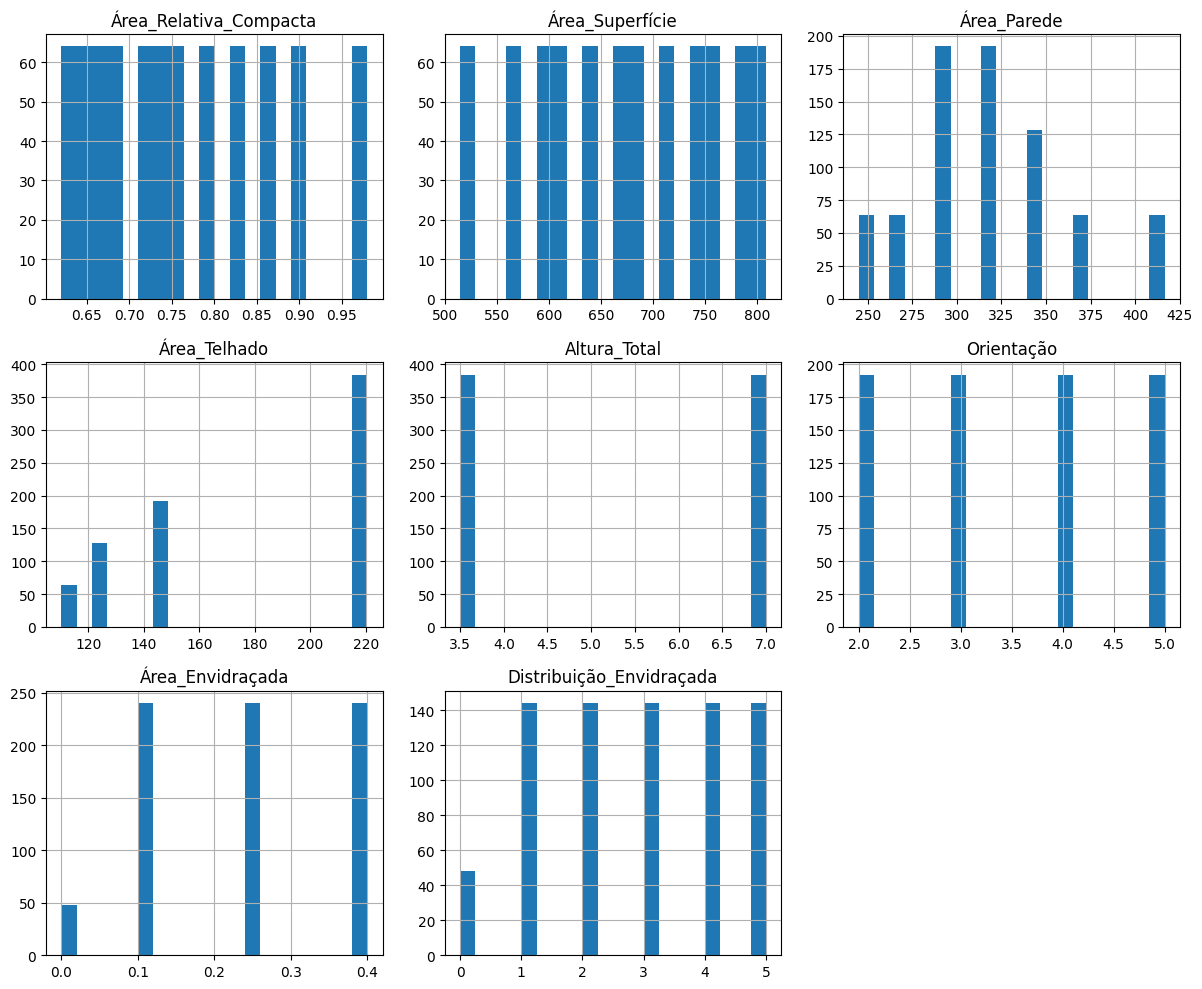

In [30]:
# Histograma para cada variável
dados[['Área_Relativa_Compacta', 'Área_Superfície', 'Área_Parede', 'Área_Telhado', 
       'Altura_Total', 'Orientação', 'Área_Envidraçada', 'Distribuição_Envidraçada']].hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

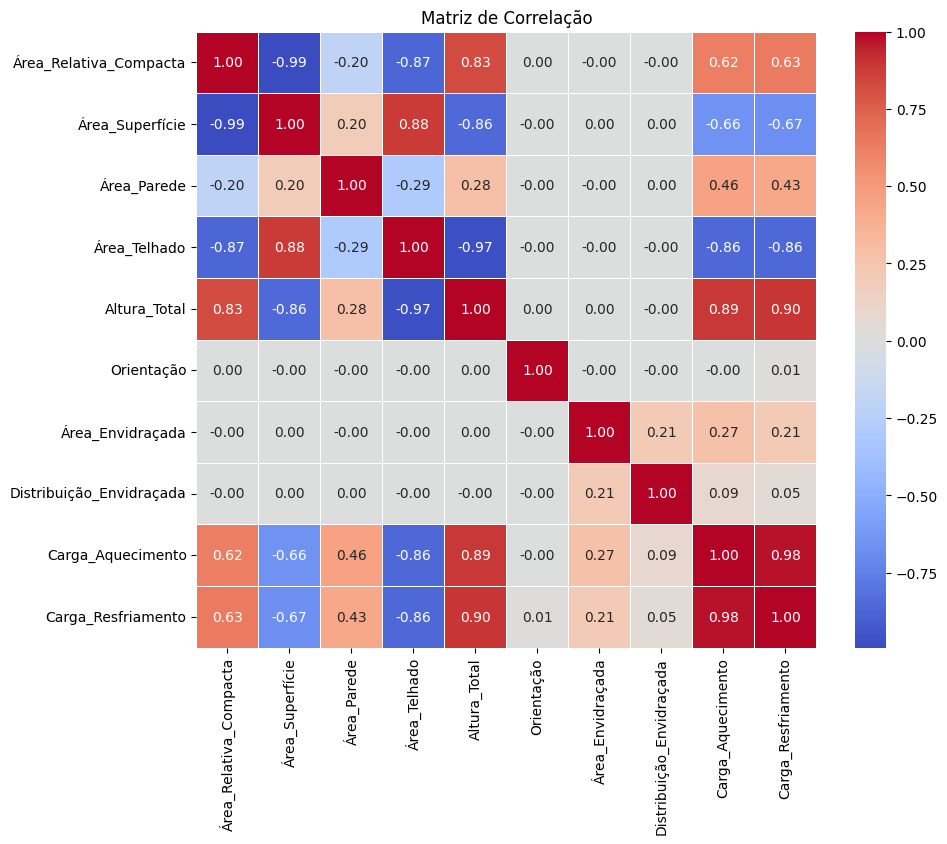

In [31]:
# Matriz de correlação
corr_matrix = dados.corr()

# Heatmap da correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

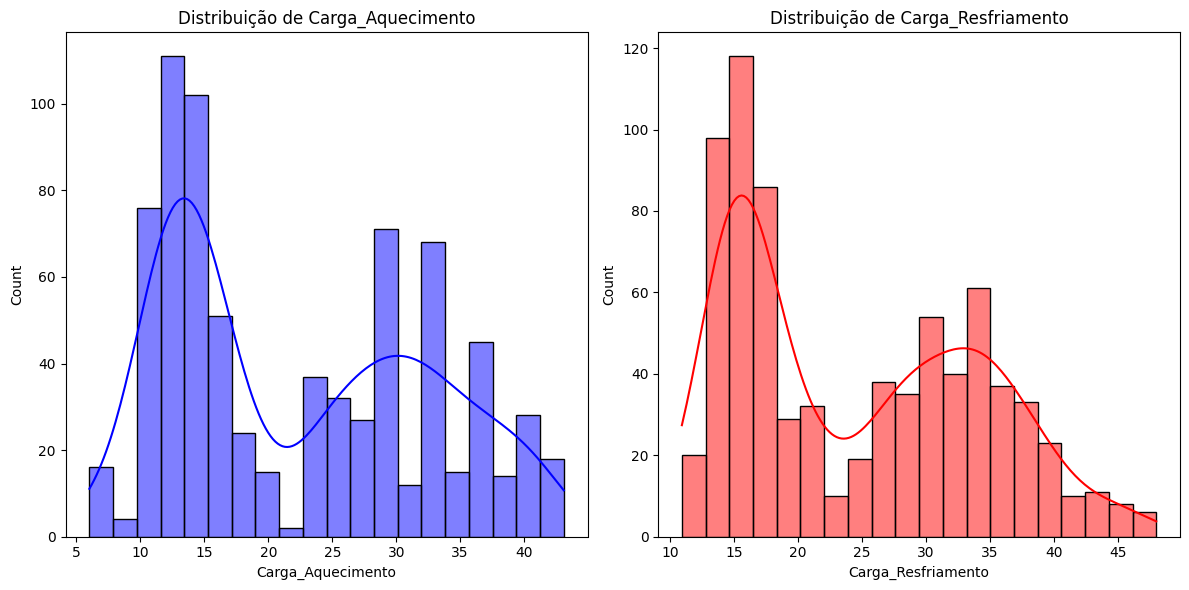

In [32]:
# Distribuição das variáveis dependentes (Carga_Aquecimento e Carga_Resfriamento)
plt.figure(figsize=(12, 6))

# Subplot para Carga_Aquecimento
plt.subplot(1, 2, 1)
sns.histplot(dados['Carga_Aquecimento'], bins=20, kde=True, color='blue')
plt.title('Distribuição de Carga_Aquecimento')

# Subplot para Carga_Resfriamento
plt.subplot(1, 2, 2)
sns.histplot(dados['Carga_Resfriamento'], bins=20, kde=True, color='red')
plt.title('Distribuição de Carga_Resfriamento')

plt.tight_layout()
plt.show()

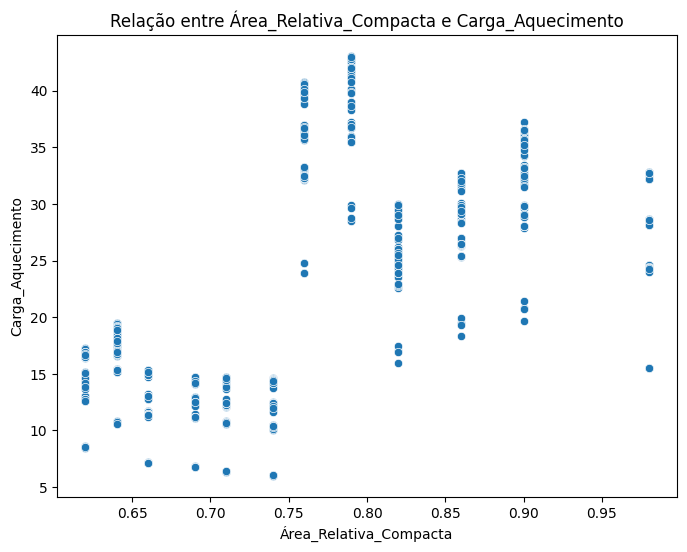

In [33]:
# Gráfico de dispersão entre Carga_Aquecimento e uma das variáveis independentes (exemplo: Área_Relativa_Compacta)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dados['Área_Relativa_Compacta'], y=dados['Carga_Aquecimento'])
plt.title('Relação entre Área_Relativa_Compacta e Carga_Aquecimento')
plt.xlabel('Área_Relativa_Compacta')
plt.ylabel('Carga_Aquecimento')
plt.show()

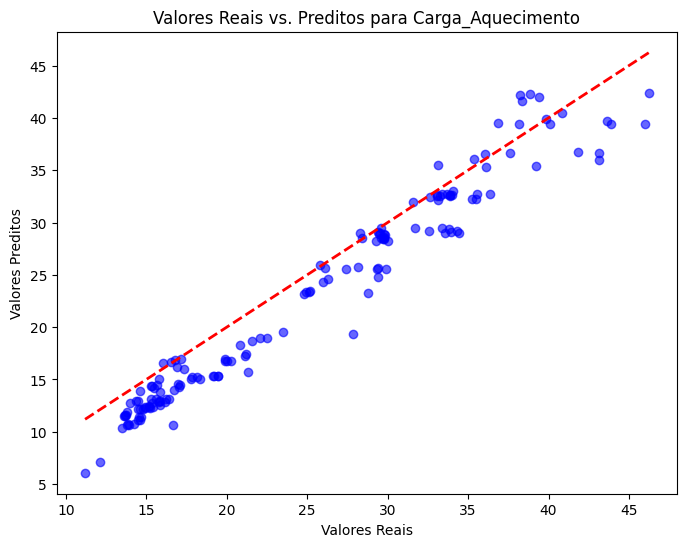

In [34]:
# Valores reais vs. preditos para Carga_Aquecimento
plt.figure(figsize=(8, 6))
plt.scatter(y_teste, y_pred_aquecimento, color='blue', alpha=0.6)
plt.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], color='red', lw=2, linestyle='--')  # linha de identidade
plt.title('Valores Reais vs. Preditos para Carga_Aquecimento')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.show()

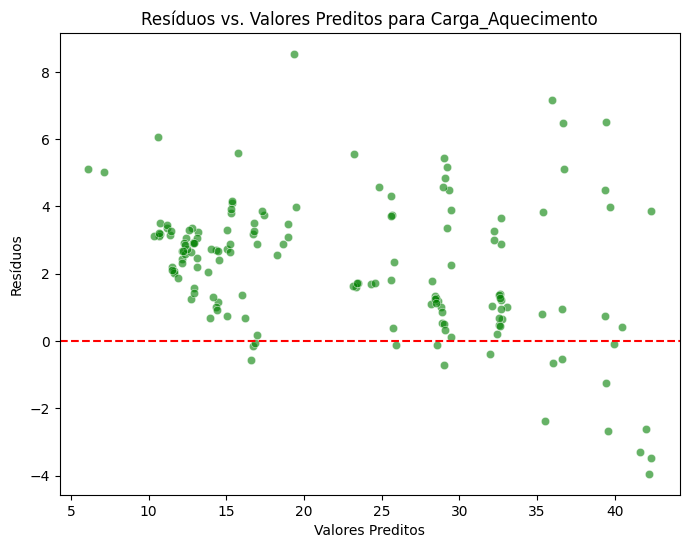

In [35]:
# Erros residuais para Carga_Aquecimento
residuos = y_teste - y_pred_aquecimento
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_aquecimento, y=residuos, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs. Valores Preditos para Carga_Aquecimento')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()